###**Dataset**

Dataset Link: https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv

**About the dataset:**

Different features related to the breast are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe the characteristics of the cell nuclei present in the image.


* id: Id number
* agnosis: Cancer is Malignant or Benign (M = malignant, B = benign) - target variable

Other 20 features contain information about following 10 real valued features

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values) 
* perimeter 
* area 
* smoothness (local variation in radius lengths) 
* compactness (perimeter^2 / area - 1.0) 
* concavity (severity of concave portions of the contour) 
* concave points (number of concave portions of the contour) 
* symmetry  
* fractal dimension ("coastline approximation" - 1)

# Task 1

## Import Necessary Libraries

In [ ]:
! pip install shap

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import shap

shap.initjs()

## Load the data
Display the first 5 rows of the data after loading.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv')
df.head(5)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,914102,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,0.1713,0.05888,0.3237,1.473,2.326,26.07,0.007802,0.02052,0.01341,0.005564,0.02086,0.002701,14.50,28.46,95.29,648.3,0.1118,0.1646,0.07698,0.04195,0.2687,0.07429,B
1,91858,11.75,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,0.1598,0.06677,0.4384,1.907,3.149,30.66,0.006587,0.01815,0.01737,0.013160,0.01835,0.002318,13.50,27.98,88.52,552.3,0.1349,0.1854,0.13660,0.10100,0.2478,0.07757,B
2,88466802,10.65,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,0.2497,1.493,1.497,16.64,0.007189,0.01035,0.01081,0.006245,0.02158,0.002619,12.25,35.19,77.98,455.7,0.1499,0.1398,0.11250,0.06136,0.3409,0.08147,B
3,9111843,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,0.1912,1.705,1.516,13.86,0.007334,0.02589,0.02941,0.009166,0.01745,0.004302,13.09,37.88,85.07,523.7,0.1208,0.1856,0.18110,0.07116,0.2447,0.08194,B
4,84862001,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,0.5692,1.073,3.854,54.18,0.007026,0.02501,0.03188,0.012970,0.01689,0.004142,20.96,31.48,136.80,1315.0,0.1789,0.4233,0.47840,0.20730,0.3706,0.11420,M


In [ ]:
df.shape

(398, 32)

## Perform Basic Exploratory Data Analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       398 non-null    int64  
 1   radius_mean              398 non-null    float64
 2   texture_mean             398 non-null    float64
 3   perimeter_mean           398 non-null    float64
 4   area_mean                398 non-null    float64
 5   smoothness_mean          398 non-null    float64
 6   compactness_mean         398 non-null    float64
 7   concavity_mean           398 non-null    float64
 8   concave points_mean      398 non-null    float64
 9   symmetry_mean            398 non-null    float64
 10  fractal_dimension_mean   398 non-null    float64
 11  radius_se                398 non-null    float64
 12  texture_se               398 non-null    float64
 13  perimeter_se             398 non-null    float64
 14  area_se                  3

In [ ]:
df.describe().iloc[:, 1:]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,14.070997,19.331985,91.589121,651.631910,0.096289,0.103197,0.087454,0.047821,0.181122,0.062800,0.408930,1.208941,2.897574,40.869198,0.007109,0.025200,0.032094,0.011780,0.020624,0.003767,16.202219,25.647286,106.882337,876.737186,0.132595,0.249983,0.269575,0.112627,0.288792,0.083445
std,3.577839,4.221225,24.706388,358.679197,0.012988,0.050805,0.079728,0.038329,0.026829,0.006794,0.287366,0.530928,2.148714,48.740479,0.003016,0.017410,0.032599,0.006423,0.008430,0.002644,4.898797,6.171891,34.370030,581.202196,0.022235,0.150280,0.210256,0.065617,0.058800,0.016469
min,6.981000,10.720000,43.790000,143.500000,0.052630,0.026500,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.002826,0.003012,0.000000,0.000000,0.007882,0.000950,7.930000,12.870000,50.410000,185.200000,0.084840,0.043270,0.000000,0.000000,0.156500,0.055040
25%,11.645000,16.172500,74.690000,415.375000,0.086635,0.066013,0.028010,0.019787,0.161650,0.057717,0.227150,0.828900,1.565250,17.602500,0.005237,0.013015,0.015100,0.007516,0.015022,0.002272,12.980000,20.807500,83.730000,510.325000,0.116875,0.148600,0.116500,0.063533,0.250050,0.071240
50%,13.205000,18.895000,85.660000,538.300000,0.096515,0.095090,0.059935,0.033420,0.179300,0.061770,0.324650,1.141000,2.306000,24.380000,0.006374,0.020210,0.025265,0.011050,0.018780,0.003162,14.800000,25.225000,96.085000,671.500000,0.131600,0.211750,0.223050,0.100465,0.280650,0.080210
75%,15.745000,21.660000,103.700000,780.325000,0.105300,0.129550,0.126675,0.068282,0.195675,0.066188,0.501175,1.466750,3.463750,45.732500,0.008300,0.031992,0.041955,0.014770,0.023203,0.004488,18.540000,29.622500,125.075000,1048.500000,0.146375,0.330650,0.377400,0.157250,0.316875,0.091990
max,28.110000,33.810000,188.500000,2501.000000,0.132600,0.345400,0.426400,0.191300,0.290600,0.095750,2.873000,3.896000,21.980000,542.200000,0.031130,0.106400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,0.937900,1.252000,0.291000,0.577400,0.148600


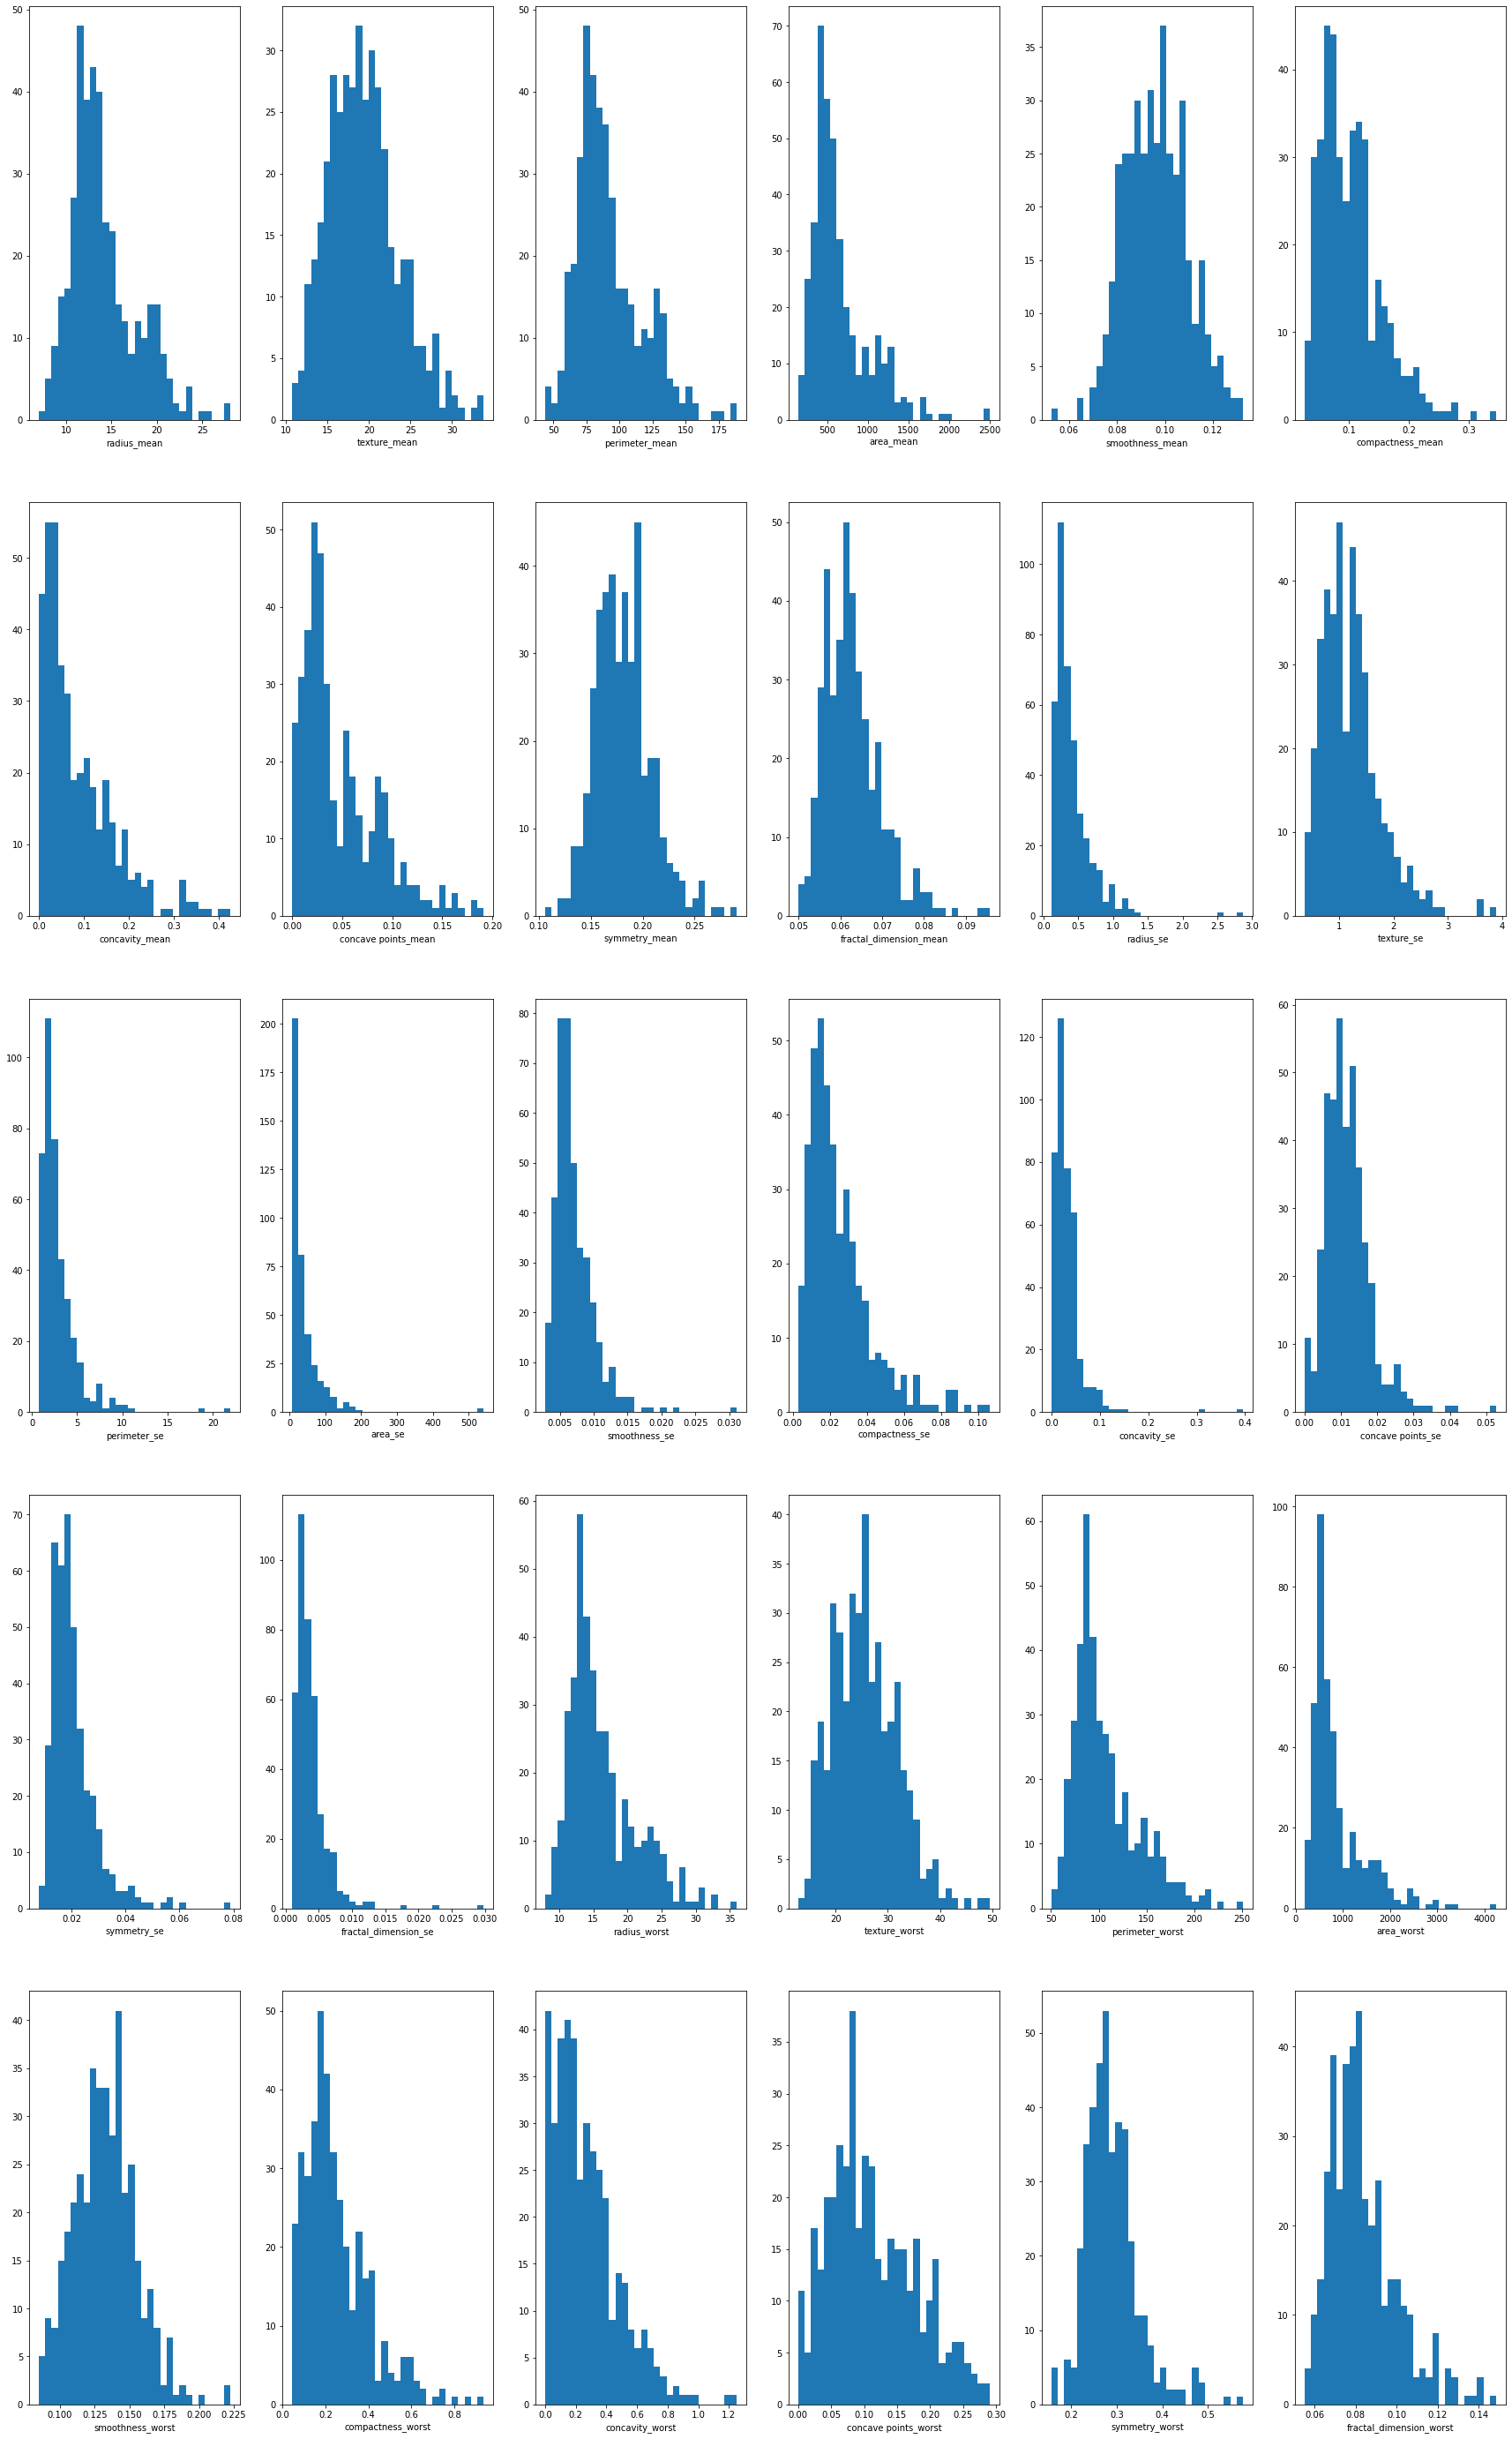

In [ ]:
#generating multiple histogram
numeric_col = df.select_dtypes('float64').columns #retrieve numeric columns

plt.figure(figsize = (30, 50))

for i, j in enumerate(numeric_col):
  plt.subplot(5,6,i+1)
  plt.hist(df[j], bins = 30)
  plt.xlabel(j)



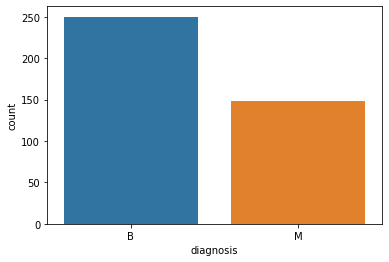

In [ ]:
sns.countplot(data = df, x='diagnosis')
plt.show()

## Split the data into Train and Test Sets
The train to test ratio should be 80:20 and the random_state should be 0.

In [ ]:
#transform output label
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
df['diagnosis'] = df['diagnosis'].astype('int')

In [ ]:
df['diagnosis'].value_counts()

0    250
1    148
Name: diagnosis, dtype: int64

The value count shows label 0 is benign and 1 is malignant as the count correspond to the countplot before.

In [ ]:
y = df.diagnosis
X = df.drop(['diagnosis', 'id'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       398 non-null    int64  
 1   radius_mean              398 non-null    float64
 2   texture_mean             398 non-null    float64
 3   perimeter_mean           398 non-null    float64
 4   area_mean                398 non-null    float64
 5   smoothness_mean          398 non-null    float64
 6   compactness_mean         398 non-null    float64
 7   concavity_mean           398 non-null    float64
 8   concave points_mean      398 non-null    float64
 9   symmetry_mean            398 non-null    float64
 10  fractal_dimension_mean   398 non-null    float64
 11  radius_se                398 non-null    float64
 12  texture_se               398 non-null    float64
 13  perimeter_se             398 non-null    float64
 14  area_se                  3

# Task 2

## Use Random Forest Machine Learning Model for prediction

In [ ]:
rf = RandomForestClassifier(n_estimators = 200, criterion ='gini', #instantiate random forest
    class_weight = 'balanced_subsample', max_features = 'auto', random_state = 0) 

rf.fit(X_train, y_train) #model fit

RandomForestClassifier(class_weight='balanced_subsample', n_estimators=200,
                       random_state=0)

In [ ]:
#make prediction
y_pred = rf.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0])

## Evaluate the model using Accuracy Score

In [ ]:
print('Random Forest accuracy score: ', accuracy_score(y_test, y_pred))

Random Forest accuracy score:  0.9625


# Task 3: Explaining the model with SHAP and Lime.

##  Use a SHAP Explainer to derive SHAP Values for the random forest ml model.

In [ ]:
#instantiate explainer
explainer = shap.TreeExplainer(rf)

#get the shap values
shap_values = explainer.shap_values(X_test)

#reference values
print('reference values:', explainer.expected_value)

reference values: [0.5 0.5]


In [ ]:
np.array(shap_values).shape

(2, 80, 30)

## Write your inferences from the generated plot.

The shap's expected values is the value we are going to assume if we do not know any current features of the current output. The expected value given is two values correspond to the class output, benign and malignant with both the expected values are `0.5`. The shap values is 3 dimensional `(2,80,30)`. The first dimension is shap values for predicting beningn class while the second one is for predicting malignant. The second and third dimensions are number of samples and features respectively.



# Task 4

## Plot a SHAP force plot for the first row of test data.

In [ ]:
#preview first row in test set
X_test.iloc[[0]]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
65,14.25,21.72,93.63,633.0,0.09823,0.1098,0.1319,0.05598,0.1885,0.06125,0.286,1.019,2.657,24.91,0.005878,0.02995,0.04815,0.01161,0.02028,0.004022,15.89,30.36,116.2,799.6,0.1446,0.4238,0.5186,0.1447,0.3591,0.1014


In [ ]:
#identify output value of first row
y_test.iloc[[0]]

65    1
Name: diagnosis, dtype: int64

The output value is 1, which mean malignant.



In [ ]:
shap.initjs()
choosen_instance = X_test.iloc[[0]]
first_shape_values = explainer.shap_values(choosen_instance)
shap.force_plot(explainer.expected_value[1], first_shape_values[1], choosen_instance)

## Write your inferences from the generated plot.

The plot shows that `concavity_mean`, `concave_points_worst`, `perimeter_worst` and lots more features become the factor of that cell to be classified as malignant. However there are some features such as radius_worst tries to classifeid it as benign. Nevertheless, as many features push the score to be greater than base value, the cell classified as malignant.

# Task 5

## Plot a SHAP force plot for all the rows of the data

In [ ]:
shap.initjs()

shap.force_plot(explainer.expected_value[1], shap_values[1], X_test)

## Write your inferences from the generated plot.

The plot above shows that:


*   The first 37 cells mostly classified as malignant because the `area_mean > 700`, `radius_worst > 15`, `perimeter_worst > 100`, `concave_points_worst > 0.14`, `concave_points_mean > 0.07`, etc.
*   while 38 cells and beyond mostly classified as benign because their characteristics are completely apposite from malignant's characteristics.



# Task 6

## Plot a SHAP summary plot using all the features in the data

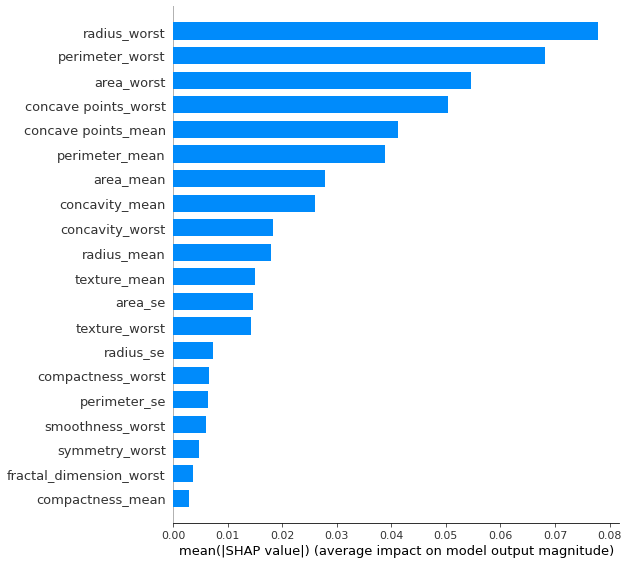

In [ ]:
shap.initjs()
shap.summary_plot(shap_values[1], X_test, plot_type='bar')

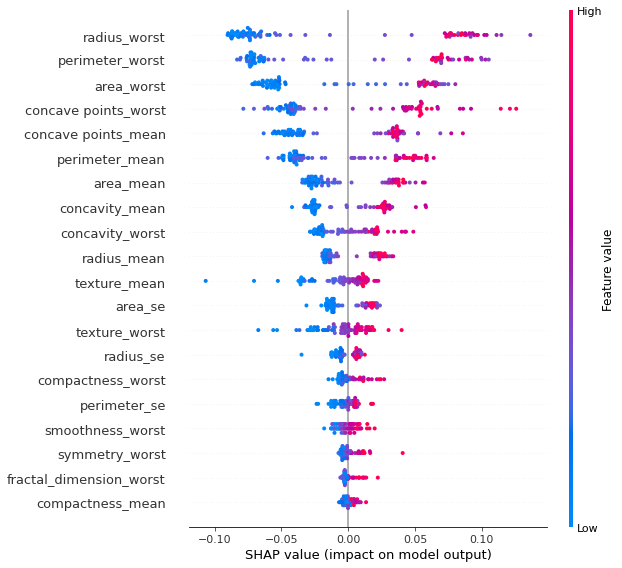

In [ ]:
shap.initjs()
shap.summary_plot(shap_values[1], X_test)

## Write your inferences from the generated plot.

The above plot showed that `area_worst`, `radius_worst`, `perimeter_worst`, `concave_points_worst`, `concave_points_mean` are the top 5 features in determining whether the cell is malignant or not. The least important features are `symmetry_worst`, `fractal_dimension_worst` and `compacteness_mean`.

# Task 7

##Plot a SHAP dependence plot using all features in the data

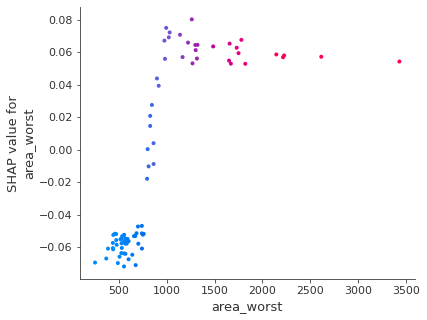

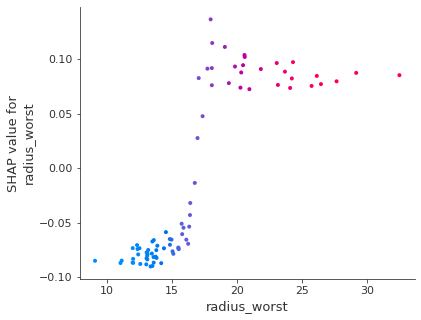

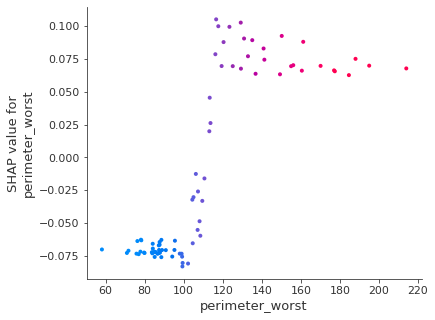

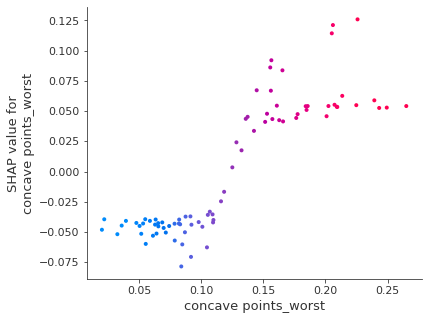

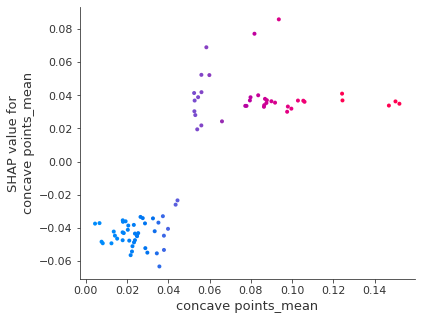

In [ ]:
#construct dependence plot of top 5 importance features

top_5 = ['area_worst', 'radius_worst', 'perimeter_worst', 'concave points_worst', 'concave points_mean']
shap.initjs()

for i in top_5:
  shap.dependence_plot(ind=i, interaction_index=i, shap_values=shap_values[1], features=X_test)

## Write your inferences from the generated plot.

As the values in all the features increase, the shap values also increase. Thus, it pushing the model's prediction to say that these cells are malignant.

# Task 8 (Optional)

## Do anything and everything with SHAP
This is the section to explore what more you can do with SHAP. Create some meaningful visualisations and write down what you can infer from them. 

Who knows, this section might carry some bonus points.

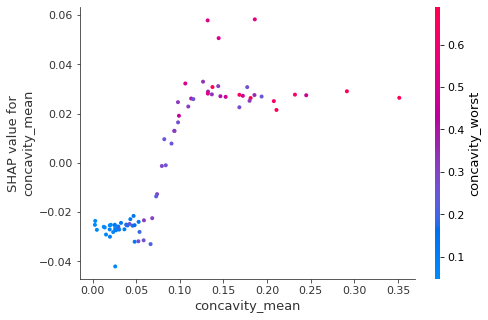

In [ ]:
#interaction between concavity mean and concavity worst

shap.initjs()
shap.dependence_plot(ind='concavity_mean', interaction_index='concavity_worst', shap_values=shap_values[1], features=X_test)

The above plot shows that higher concavity mean and concavity worst lead to malignant

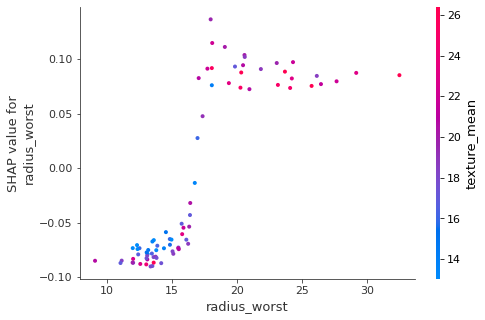

In [ ]:
#interaction between radius worst and and texture mean

shap.initjs()
shap.dependence_plot(ind='radius_worst', interaction_index='texture_mean', shap_values=shap_values[1], features=X_test)

As the radius get worse and texture mean increase, it pushes the model to predict malignant. However, there are some cases where even low radius worst can have high texture mean. 